<a href="https://colab.research.google.com/github/UMAIR-777/DATA-SCIENCE-PORTFOLIO/blob/main/PRINIPAL_COMPONENT_ANALYSIS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [18]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
sns.set_theme(style="darkgrid")
np.random.seed(42)

In [19]:
le = LabelEncoder()


In [20]:
train_data = pd.read_csv("data_set_ALL_AML_train.csv")
test_data = pd.read_csv("data_set_ALL_AML_independent.csv")
labels = pd.read_csv("actual.csv", index_col = 'patient')

In [21]:
train_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


# Checking null values

In [22]:
print(train_data.isna().sum().sum())
print(test_data.isna().sum().sum())

0
0


# EDA and data preprocessing¶

In [23]:
cols_train = [col for col in train_data.columns if "call" in col]
cols_test = [col for col in test_data.columns if "call" in col]

train_data.drop(cols_train, axis=1, inplace=True)
test_data.drop(cols_test, axis=1, inplace=True)

Here we have features in rows and patients in cols, so we need to transpose data.



In [24]:
train_data = train_data.T
test_data = test_data.T

In [25]:
train_data.head()


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [26]:
train_data.columns = test_data.iloc[1].values
train_data.drop(["Gene Description", "Gene Accession Number"], axis=0, inplace=True)
test_data.columns = test_data.iloc[1].values
test_data.drop(["Gene Description", "Gene Accession Number"], axis=0, inplace=True)

In [27]:
train_data.head()


,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [28]:
# Adding new column
train_data["patient"] = train_data.index.values
test_data["patient"] = test_data.index.values

In [29]:
train_data = train_data.astype("int32")
test_data = test_data.astype("int32")

In [30]:
labels["cancer"] = le.fit_transform(labels["cancer"])
train_data = pd.merge(train_data, labels, on="patient")
test_data = pd.merge(test_data, labels, on="patient")

In [31]:
train_data["cancer"].value_counts()


cancer
0    27
1    11
Name: count, dtype: int64

In [32]:
test_data["cancer"].value_counts()


cancer
0    20
1    14
Name: count, dtype: int64

<ipython-input-39-401219de054f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-39-401219de054f>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




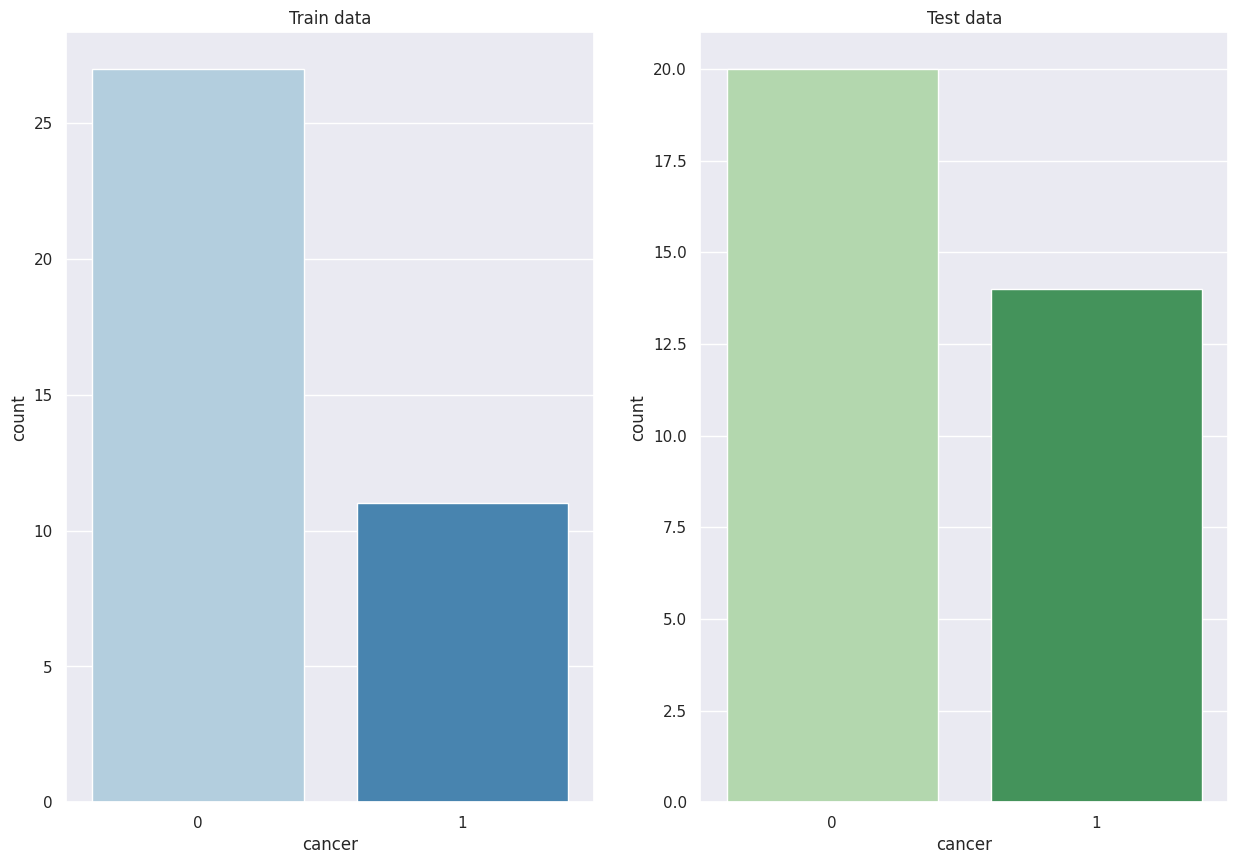

In [39]:
fig, axs = plt.subplots(1, 2)
sns.countplot(x="cancer", data=train_data, palette="Blues", ax=axs[0])
axs[0].set_title("Train data", fontsize=12)
sns.countplot(x="cancer", data=test_data,palette="Greens", ax=axs[1])
axs[1].set_title("Test data", fontsize=12)
plt.show()

In [40]:
X_train = train_data.drop(columns=["patient", "cancer"])
y_train = train_data["cancer"]
X_test = test_data.drop(columns=["patient", "cancer"])
y_test = test_data["cancer"]

In [41]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Dimentionality reduction and clusterisation¶

In [42]:
reduced_train = PCA().fit_transform(X_train_scaled)
kmeans = KMeans(n_clusters=2, n_init=20)
kmeans.fit(train_data)

KMeans(n_clusters=2, n_init=20)

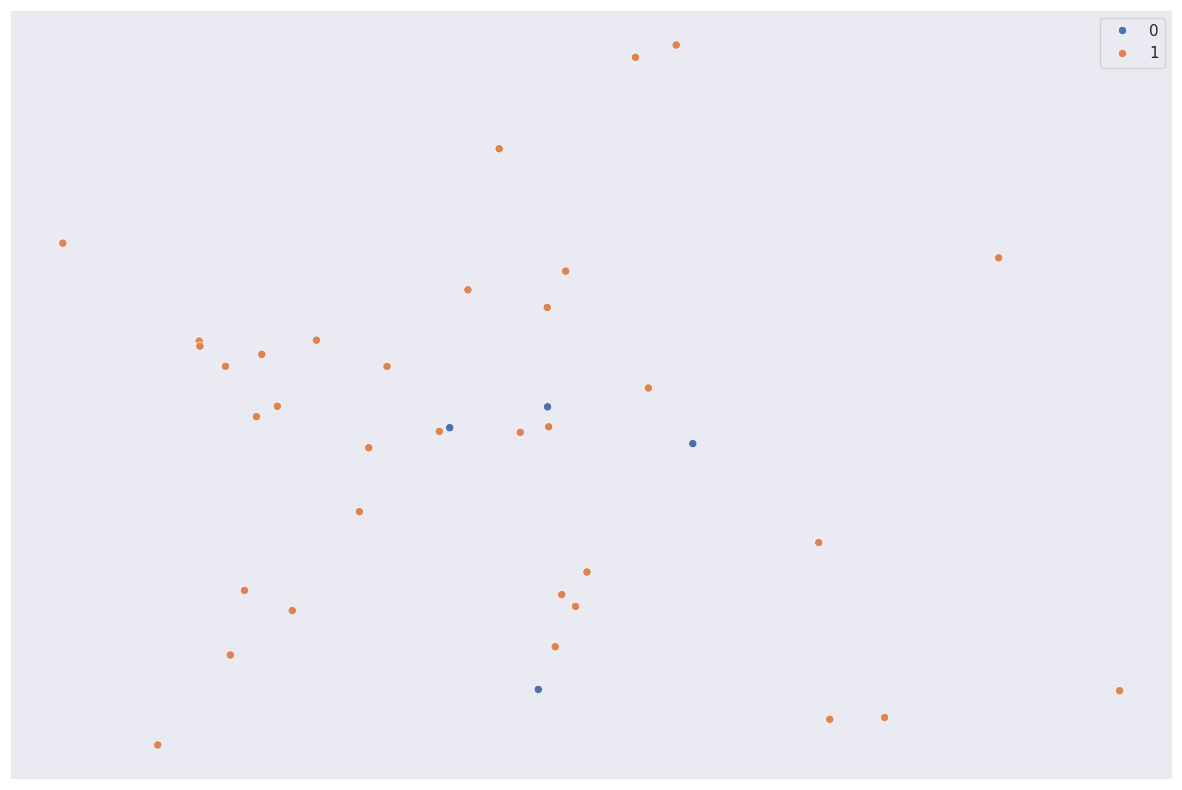

In [43]:
sns.scatterplot(x=reduced_train[0], y=reduced_train[1], hue=kmeans.labels_)
plt.xticks(())
plt.yticks(())
plt.show()

Seems like we can't define two clear clusters (at least by KMeans and using 2 PC for visualisation). It is not a problem now. Now I want to calculate PC so that they will explain at least 90% of variance and may be I can use them in downstream models.



28 features explain around 90% of the variance. From 7129 features to 28


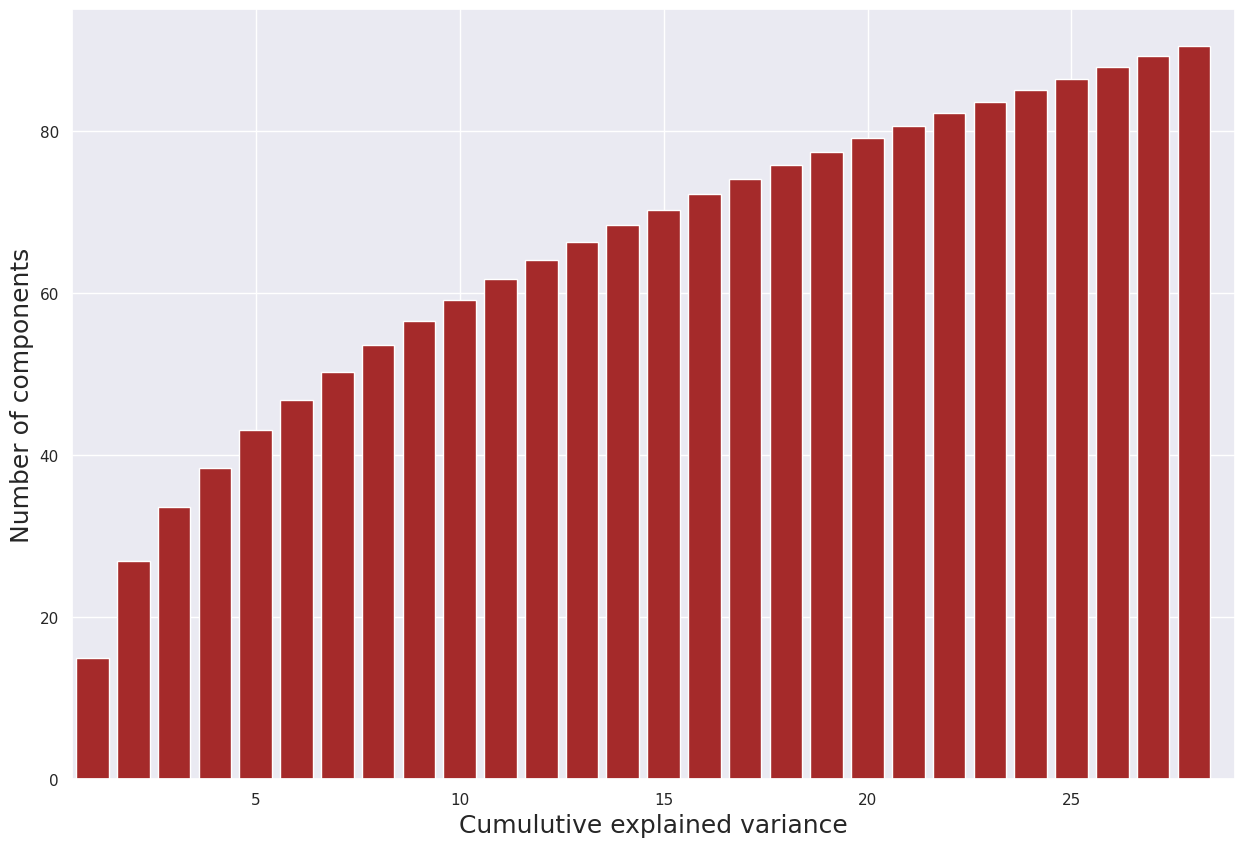

In [45]:
pca = PCA()
pca.fit_transform(X_train_scaled)
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance / total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
print(k, " features explain around 90% of the variance. From 7129 features to ", k, sep='')

pca = PCA(n_components=k)
X_train_pca = pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(1, k + 1), var_exp, color="brown")
plt.xlabel("Cumulutive explained variance", fontsize=18)
plt.ylabel("Number of components", fontsize=18)
plt.xlim((0.5, k + 1))
plt.show()

In [47]:
cancer_labels = train_data["cancer"].map({0: le.classes_[0], 1: le.classes_[1]}).values
patient_labels = np.array(list(map(str, train_data["patient"].values))).astype("object") + "_" + cancer_labels

In [48]:
link = linkage(X_train_scaled, 'ward', 'euclidean')


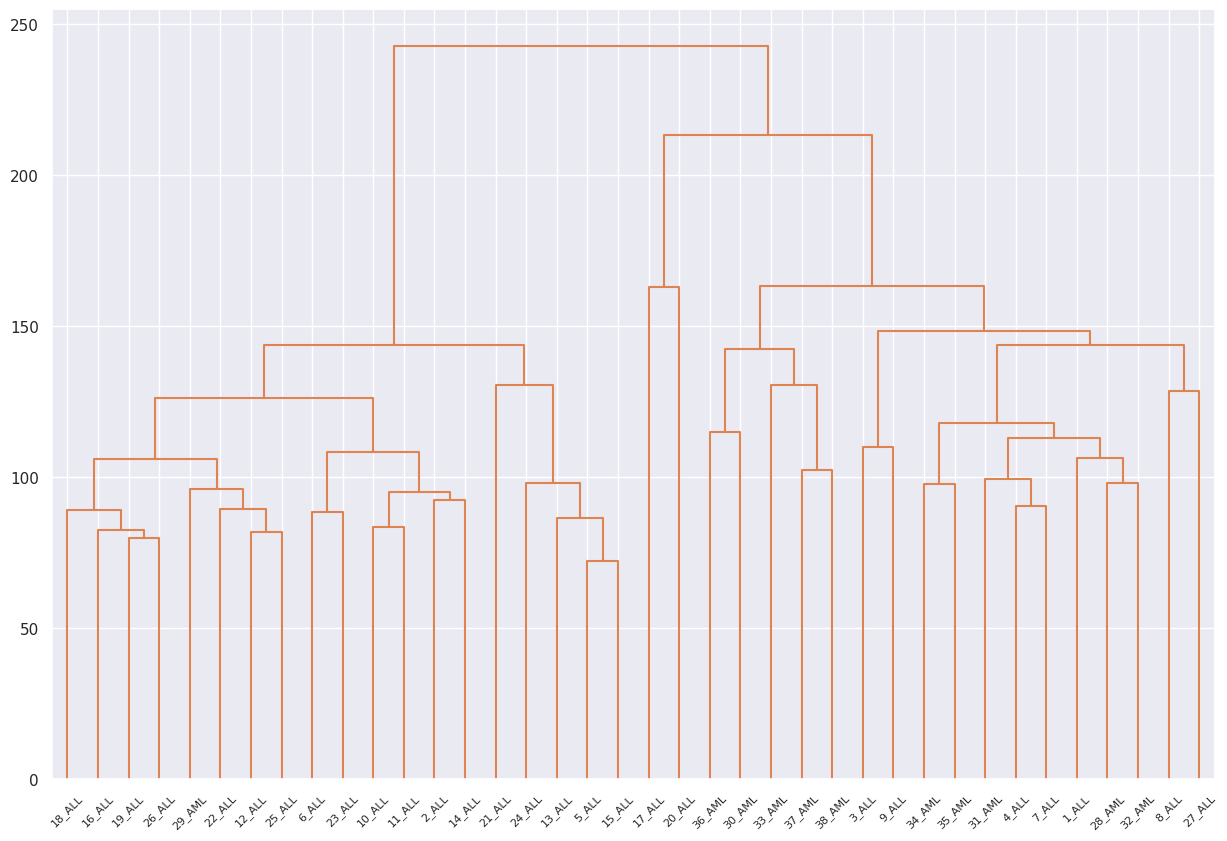

In [49]:
dm = dendrogram(link, color_threshold=1250, labels=patient_labels)


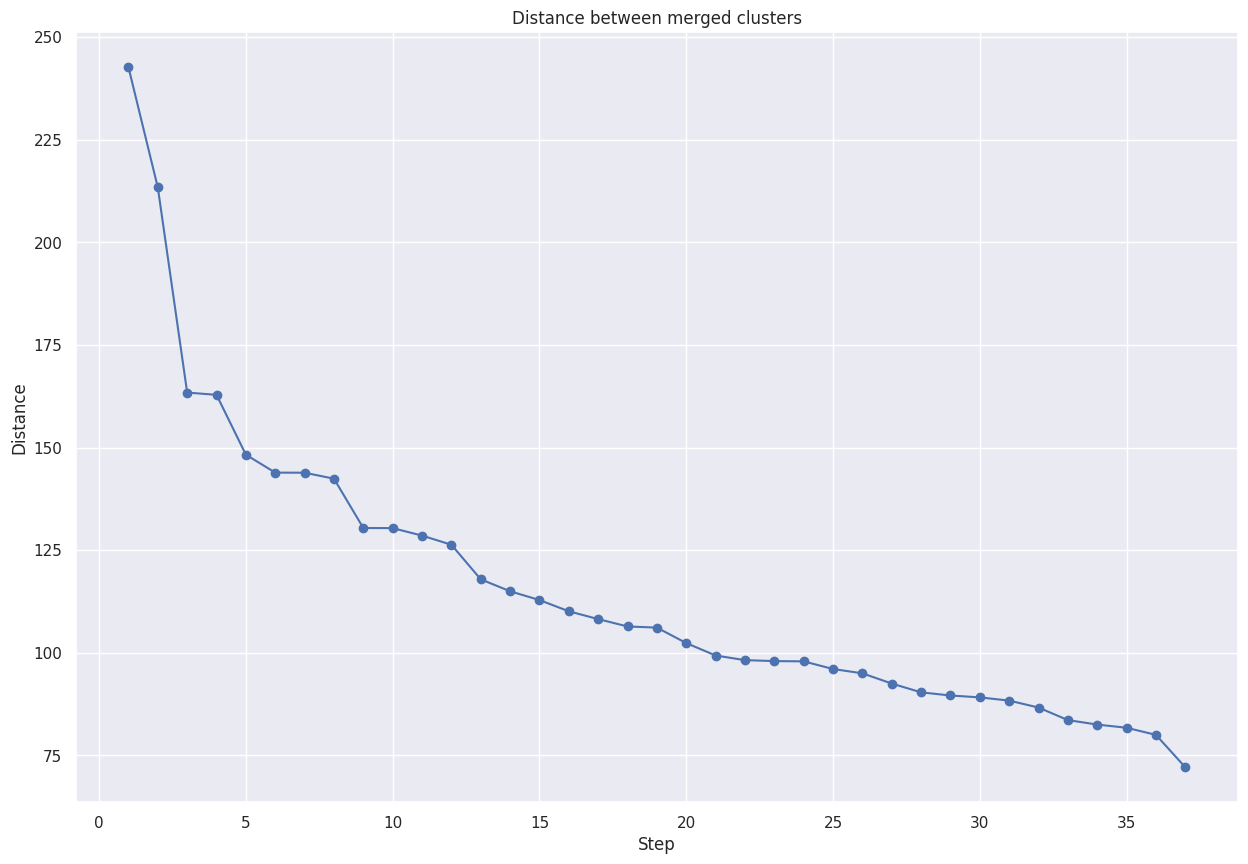

In [50]:
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.show()

We can not to take right part of this plot into account (because it just a upsampled data). Dendrogram shows us that we can't extract two clusters based on cancer type, but the first large cluster contain almost only ALL and the second one contains both cancer types. Distance plot tells that it is a good way to distinguish 6 clusters. But it is just a preliminary analysis. Our main goal is build a classifier.

# Classification models

# Random forest model

In [52]:
rf_params = {"bootstrap": [False, True],
             "n_estimators": [60, 70, 80, 90, 100],
             "max_features": [0.6, 0.65, 0.7, 0.75, 0.8],
             "min_samples_leaf": [8, 10, 12, 14],
             "min_samples_split": [3, 5, 7]
        }

rf_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_params, scoring="f1")
rf_search.fit(X_train_scaled, y_train)
best_rf = rf_search.best_estimator_


In [53]:
best_rf

RandomForestClassifier(bootstrap=False, max_features=0.6, min_samples_leaf=10,
                       min_samples_split=7, n_estimators=90)

Validation f1-score of RandomForest Classifier is 0.896551724137931

Classification report :
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.87      0.93      0.90        14

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34



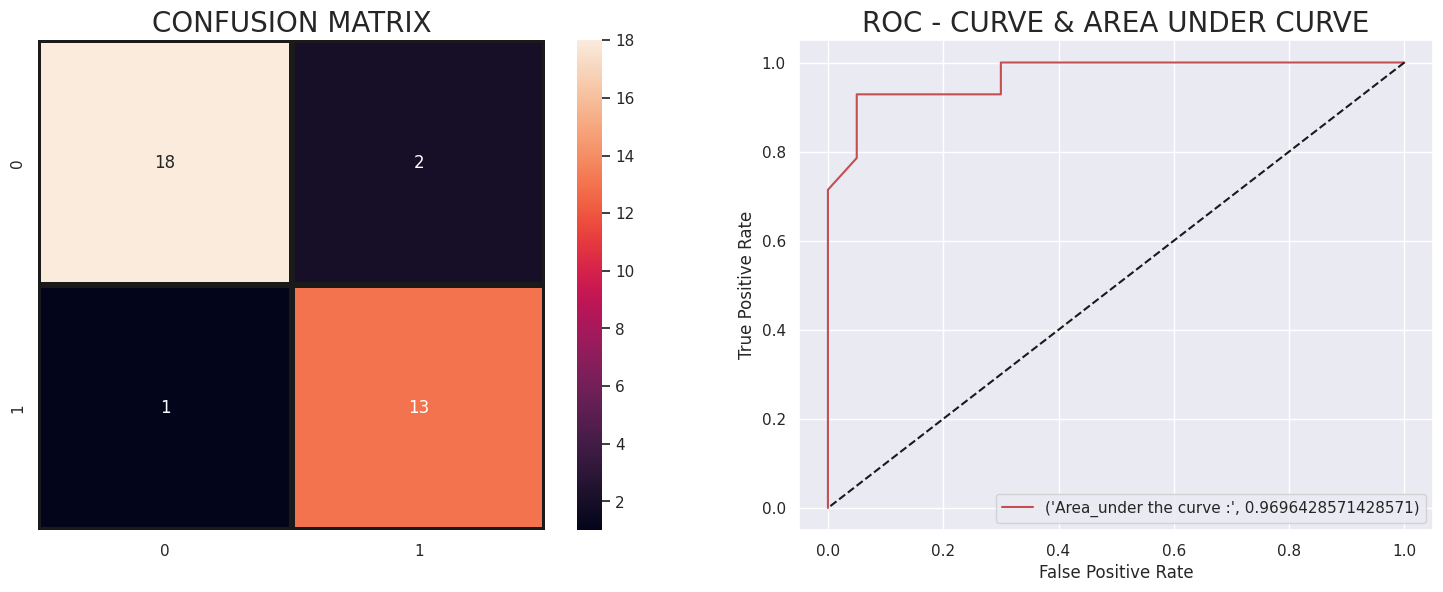

In [54]:
rf_prediction = best_rf.predict(X_test_scaled)


f1_score = metrics.f1_score(y_test, rf_prediction)
print('Validation f1-score of RandomForest Classifier is', f1_score)
print ("\nClassification report :\n", metrics.classification_report(y_test, rf_prediction))

# Confusion matrix
plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(y_test, rf_prediction), annot=True, fmt = "d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)

# ROC curve
rf_predicted_probs = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_predicted_probs)
plt.subplot(222)
plt.plot(fpr, tpr, label = ("Area_under the curve :", metrics.auc(fpr, tpr)), color = "r")
plt.plot([1,0], [1,0], linestyle = "dashed", color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
plt.show()

In [55]:
mask = (best_rf.feature_importances_ != 0)
importances = best_rf.feature_importances_[mask]
feature_names = train_data.columns.values[:7129][mask]

<ipython-input-56-8123cdc0ed2a>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



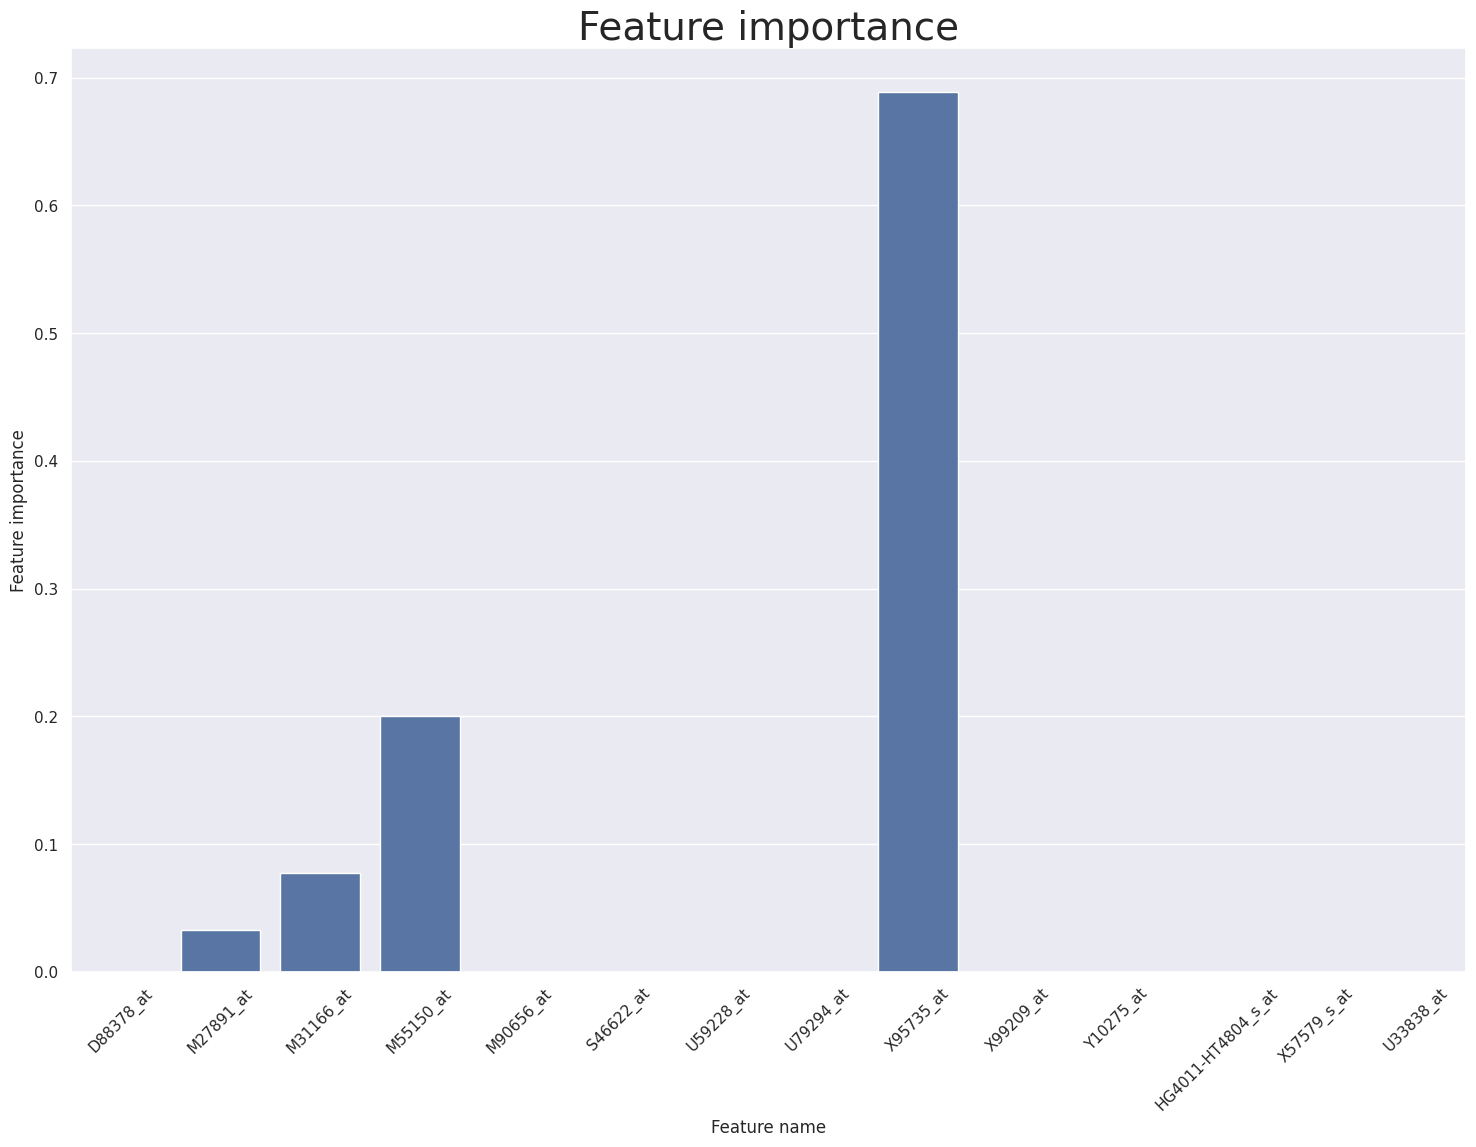

In [56]:
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111)
sns.barplot(x=feature_names, y=importances)
plt.ylabel("Feature importance")
plt.xlabel("Feature name")
plt.title("Feature importance", fontsize=28)
ax.set_xticklabels(feature_names, rotation = 45)
plt.show()

As we can see there are also lots of features with pretty low importance (about e-5), but also we can admit 4 genes, wich have a big contribution in cancer classification. So genes X95735, M55150, and M27891 contribute the most to the differences between ALL and AML cancer types in accordance with random forest classifier.

In [57]:
print(metrics.accuracy_score(y_test, rf_prediction))


0.9117647058823529
